# **PHẦN 2: MÔ HÌNH HOÁ DỮ LIỆU**

## **1. Import các packages cần thiết**

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

## **2. Đọc dữ liệu từ file csv**

In [101]:
df = pd.read_csv('./features/processed.csv')
df.shape

(48291, 24)

In [102]:
df.sample(5)

,id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,review_count,inventory_type,productset_group_name,day_ago_created,categories,all_time_quantity_sold,authors,publisher_vn,publication_date,dimensions,manufacturer,number_of_page,dich_gia,edition,luu_y
28995,173632013,7685856876337,Combo Giáo Trình Hán ngữ Boya Sơ Cấp 1 + 2 Kè...,https://tiki.vn/product-p173632013.html?spid=1...,NaN,340900,487000,30,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Học Ngoại N...,244,Sách Học Tiếng Hoa,1,NaN,MCBOOKS,NaN,NaN,hong duc,0,NaN,NaN,NaN
17660,198823396,5085709454175,COMBO BẢNG CHỮ CÁI IN HOA-IN THƯỜNG VÀ BẢNG CH...,https://tiki.vn/product-p198823396.html?spid=1...,Bìa mềm,12480,16000,22,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách thiếu nhi /...,66,Tô màu - Luyện chữ,0,NaN,ABBOOKS,NaN,NaN,Nhà Xuất Bản Đồng Nai,0,NaN,NaN,NaN
24469,117926962,8711965761024,Sách - Bẻ Khóa Bí Mật Triệu Phú,https://tiki.vn/product-p117926962.html?spid=1...,NaN,70399,70399,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách kỹ năng sốn...,475,Sách hướng nghiệp - Kỹ năng mềm,0,NaN,FIRST NEWS,NaN,NaN,Nhà Xuất Bản Tổng hợp TP.HCM,0,NaN,NaN,NaN
31137,191780411,1395313936365,Nâng cao và Phát triển Toán 3,https://tiki.vn/product-p191780411.html?spid=1...,NaN,45000,76000,41,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Tham Khảo/S...,136,Sách tham khảo cấp I,3,Nguyễn Đức Tấn,Khang Việt Book,NaN,NaN,Nhà Xuất Bản Tổng hợp TP.HCM,245,NaN,NaN,NaN
5664,169264272,5074532950632,Phạm Đức Lộc - Tuyết Đỏ,https://tiki.vn/product-p169264272.html?spid=1...,NaN,69000,98000,30,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Tru...,266,Truyện dài,0,NaN,SBOOKS,NaN,NaN,oem,0,NaN,NaN,NaN


## **3. Xác định câu hỏi cần trả lời:**
- Bài toán dự đoán `discount_rate` dựa trên các đặc trưng.
- Đây là một bài toán hồi quy.
- Input là các đặc trưng ảnh hưởng đến tỉ lệ giảm giá của một mặt hàng sách.
- Output là tỉ lệ giảm giá của sách. 

Trả lời được câu hỏi này sẽ giúp cho khách hàng và nhà bán có những quyết định phù hợp, mang lại lợi ích 

## **4. Phân tích, xử lý và chuẩn bị dữ liệu cho bước mô hình hoá**

Các cột có kiểu dữ liệu là numeric 

In [103]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['id', 'sku', 'price', 'original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold', 'number_of_page'],
      dtype='object')

In [104]:
numeric_profiles = {'missing_ratio': df[numeric_cols].isna().sum() * 100.0/len(df[numeric_cols]),
                        'min': df[numeric_cols].min(),
                        'max': df[numeric_cols].max()}
nume_col_profiles_df = pd.DataFrame(numeric_profiles).transpose()
nume_col_profiles_df

,id,sku,price,original_price,discount_rate,rating_average,review_count,day_ago_created,all_time_quantity_sold,number_of_page
missing_ratio,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
min,148562.0,1.000110e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
max,207990688.0,9.999995e+12,6000000.0,6950000.0,91.0,5.0,6306.0,2689.0,32323.0,9.786049e+12


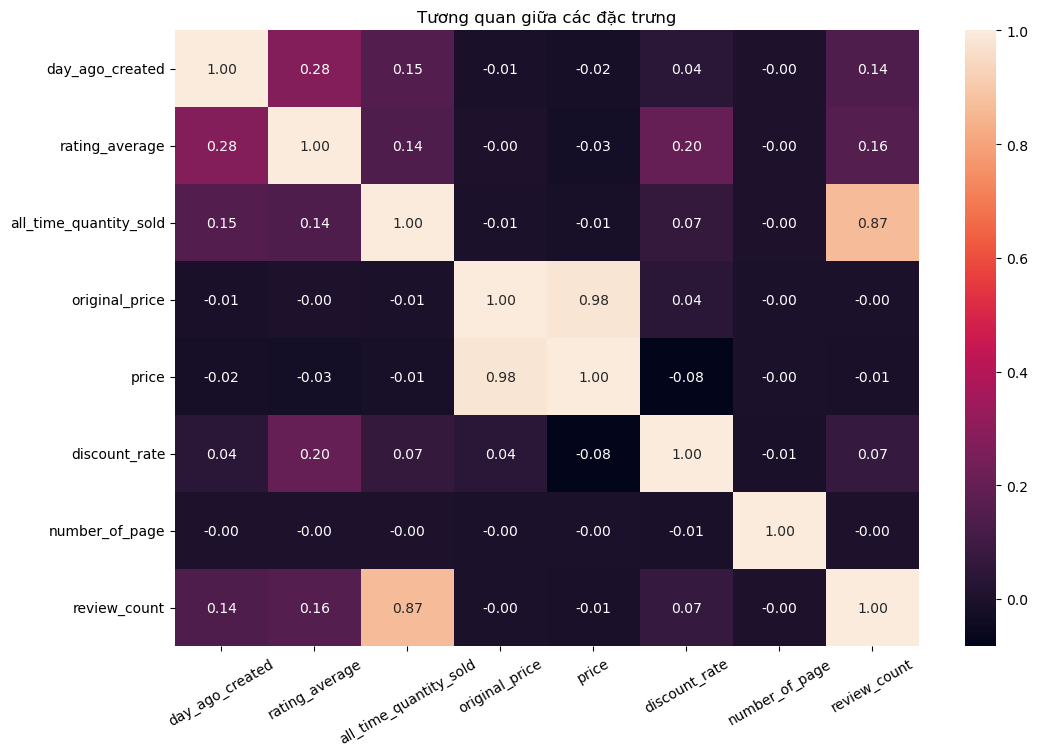

In [105]:
plt.figure(figsize=(12,8))
sns.heatmap(df[set(numeric_cols) - {'id', 'sku'}].corr(), annot=True, fmt='.2f')
plt.xticks(rotation=30)
plt.title('Tương quan giữa các đặc trưng')
plt.show()

In [106]:
cate_cols = set(df.columns) - set(numeric_cols)
cate_profiles = {'missing_ratio': df[cate_cols].isna().sum() * 100.0/len(df[cate_cols]),
               #   'zero_values_ratio':  df[cate_cols].eq(0).sum(axis=1) * 100.0/len(df[cate_cols]),
                      'num_diff_vals': df[cate_cols].nunique(dropna=True),
                      'diff_vals': df[cate_cols].stack(dropna=True).groupby(level=[1]).unique(),
                      }
cate_col_profiles_df = pd.DataFrame(cate_profiles).transpose()
cate_col_profiles_df

,authors,book_cover,categories,dich_gia,dimensions,edition,inventory_type,luu_y,manufacturer,name,productset_group_name,publication_date,publisher_vn,short_url
missing_ratio,48.804125,35.358555,0.0,85.686774,82.744197,96.931105,0.0,99.995858,0.550827,0.0,0.0,61.158394,0.035203,0.0
num_diff_vals,9094,17,100,3110,1051,364,3,1,168,44424,101,10896,852,48288
diff_vals,"[Trần Đặng Đăng Khoa, Trần Hồng Ngọc, Lê Quang...","[Bìa mềm, Bìa Da, Bìa cứng, Bìa gập, Bìa rời, ...","[Du ký, Light novel, Phê Bình - Lý Luận Văn Họ...","[Khánh Vân, Phan Quang, Nguyễn Thị Bạch Tuyết,...","[13 x 20, 14,5 x 20,5 cm, 13.5 x 20.5 cm, 15 x...","[bìa mềm, BÌA MỀM, Tiếng Việt, Tặng kèm bookma...","[instock, backorder, preorder]",[Sách không còn kèm CD mà thay bằng ứng dụng t...,"[NXB Trẻ, Nhà Xuất Bản Lao Động, Nhà Xuất Bản ...",[1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàn...,[Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Du...,"[2022-11-10 00:00:00, 2022-11-11 17:44:46, 202...","[NXB Trẻ, Chibooks, Văn Lang, Edibooks, NXB Ph...",[https://tiki.vn/product-p204317934.html?spid=...


In [107]:
df['dimensions'][df['dimensions'].str.contains('(\d+).?[xX].?(\d+).?[(cm)(CM)]?', na=False)].loc[1100]

'13x18x2.5 cm'

In [108]:
df['dimensions'].str.extractall('(\d+[.,]?\d+.?.?[xX]?.?.?\d+[.,]?\d+)').loc[39592]
df['dimensions'].str.extractall(r'(\d+.?,?\d+).?x.?(\d+.?,?\d+)[.?x.?(\d+.?,?\d+)]?')#['dimensions']

,,0,1
,match,,
0,0,13,20
2,0,"14,5","20,5"
6,0,13.5,20.5
11,0,"14,5","20,5"
14,0,15,23
...,...,...,...
47966,0,14,14
47967,0,14.5,20.5
48087,0,15,23


In [109]:
dimen = pd.DataFrame(df['dimensions'][df['dimensions'].notna()].str.replace('[a-zA-Z]', ' ').str.replace(',', '.').str.split())
# dimen['area'] = dimen['dimensions'].apply(lambda x: list(map(float, x))).apply(lambda x: np.prod(x))
dimen.loc[39592]

dimensions    [<, =", /, "><!--, {, :, 1, #, ;}, {, -, -, :,...
Name: 39592, dtype: object

In [110]:
cate_col_profiles_df.loc['diff_vals', 'categories']

array(['Du ký', 'Light novel', 'Phê Bình - Lý Luận Văn Học',
       'Phóng sự - Ký sự - Bút ký', 'Tác phẩm kinh điển', 'Thơ',
       'Tiểu sử - Hồi ký', 'Tiểu Thuyết',
       'Truyện Giả tưởng - Huyền Bí - Phiêu Lưu', 'Tranh Truyện',
       'Truyện cổ tích - Ngụ ngôn', 'Truyện cười', 'Truyện dài',
       'Bài học kinh doanh', 'Truyện đam mỹ', 'Truyện kiếm hiệp',
       'Truyện kinh dị', 'Truyện ngắn - Tản văn - Tạp Văn',
       'Truyện ngôn tình', 'Truyện trinh thám', 'Ca dao - Tục ngữ',
       'Sách ảnh', 'Sách doanh nhân', 'Sách khởi nghiệp',
       'Sách kinh tế học', 'Sách kỹ năng làm việc',
       'Sách Marketing - Bán hàng ', 'Sách quản trị, lãnh đạo',
       'Sách quản trị nhân lực', 'Sách tài chính, kế toán',
       'Sách tài chính, tiền tệ', 'Đạo đức - Kỹ năng sống',
       'Kiến thức - Bách khoa', 'Tô màu - Luyện chữ  ', 'Truyện cổ tích',
       'Truyện kể cho bé', 'Truyện tranh Ehon', 'Truyện tranh thiếu nhi',
       'Văn học thiếu nhi', 'Sách tư duy - Kỹ năng sống',
       

Chọn ra các features phù hợp/ có ảnh hưởng đến yêu cầu bài toán làm đầu vào cho mô hình 

In [111]:
cols = ['original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold', 'number_of_page']
# Thêm một vài cột categories có ý nghĩa đối với output
cate = ['book_cover', 'categories', 'inventory_type', 'manufacturer', 'publication_date']
cols.extend(cate)

Xem qua kiểu dữ liệu của các cột

In [112]:
df[cols].dtypes

original_price              int64
discount_rate               int64
rating_average            float64
review_count                int64
day_ago_created             int64
all_time_quantity_sold      int64
number_of_page              int64
book_cover                 object
categories                 object
inventory_type             object
manufacturer               object
publication_date           object
dtype: object

In [113]:
df[['categories', 'inventory_type', 'manufacturer']] = df[['categories', 'inventory_type', 'manufacturer']].astype(str)
df[['categories', 'inventory_type', 'manufacturer']]

,categories,inventory_type,manufacturer
0,Du ký,instock,NXB Trẻ
1,Du ký,backorder,NXB Trẻ
2,Du ký,instock,Nhà Xuất Bản Lao Động
3,Du ký,backorder,Nhà Xuất Bản Hồng Đức
4,Du ký,backorder,NXB Trẻ
...,...,...,...
48286,Thể Dục - Thể Thao,backorder,Nhà Xuất Bản Hà Nội
48287,Thể Dục - Thể Thao,backorder,NXB Trẻ
48288,Thể Dục - Thể Thao,backorder,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội
48289,Thể Dục - Thể Thao,backorder,Nhà Xuất Bản Thể Thao Và Du Lịch


Cột `publication_date` đang có kiểu dữ liệu là object, ta cũng cần chuyển về datetime cho phù hợp

In [114]:
df['publication_date'] = pd.to_datetime(df.publication_date, format = "%Y-%m-%d %H:%M:%S", errors = "coerce")

Có lẽ ta không cần cột này trong đầu vào của mô hình vì cột `day_ago_created` đã có ý nghĩa tương tự

In [115]:
cols.remove('publication_date')

**Xem một vài phân bố của các đặc trưng, từ đó giúp ta quan sát outliers, độ tập trung của dữ liệu**

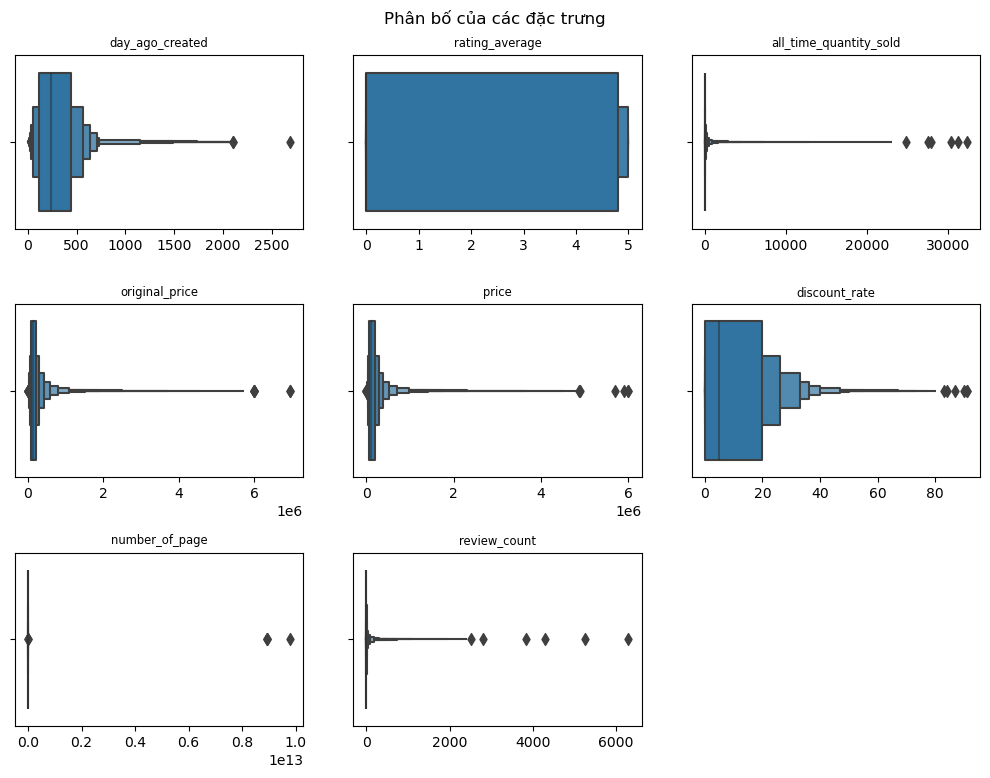

In [116]:
# df_cont = df.select_dtypes([int,float]) 
numeric_df = df[set(numeric_cols) - {'id', 'sku'}]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Phân bố của các đặc trưng')
for i,col in enumerate(numeric_df.columns, 1): 
    ax = plt.subplot(4,3,i) 
    sns.boxenplot(data = numeric_df, x=numeric_df[col]) 
    plt.xlabel(None)
    plt.title(col, fontsize='small')
    plt.tight_layout(w_pad=3) 

plt.show() 

Hầu như các cột dữ liệu đều bị lệch phải (right-skewed)
- <font color=bone>*original_price*</font> và <font color=bone>*price*</font> có phân bố khá giống nhau, có vài điểm outliers khá lớn
- <font color=bone>*day_ago_created*</font> thì phân bố tập trung trong khoảng 0-500 và giảm dần về 2000
- <font color=bone>*rating_average*</font> phân bố khá đồng đều từ 0 đến 5
- <font color=bone>*all_time_quantity_sold*</font> phân bố chủ yếu ở giá trị 0, xấp xỉ 0 và rải rác từ 0 đến hơn 30000
- <font color=bone>*review_count*</font> cũng tương tự, tuy nhiên nằm rải rác từ 0 đến hơn 6000
- <font color=bone>*discount_rate*</font> chủ yếu phân bố từ 0-40 và thưa thớt ở các giá trị rate cao hơn
- Riêng với <font color=bone>*number_of_page*</font> có outlier khá "khủng" nên ta sẽ xử lý riêng và vẽ lại biểu đồ của cột này

Text(0.5, 1.0, 'Phân bố của number_of_page sau khi clip các giá trị ngoại lệ')

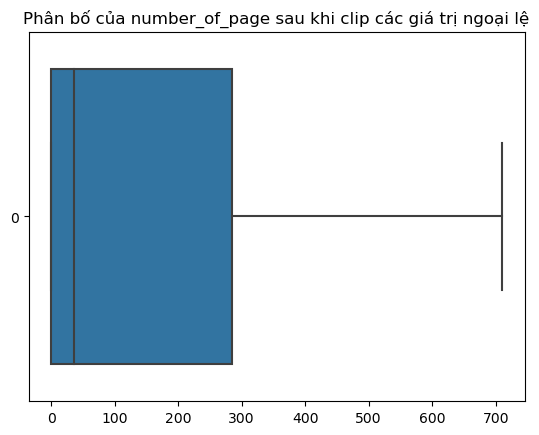

In [172]:
# ref: https://machinelearningcoban.com/tabml_book/ch_data_processing/process_outliers.html
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin
def find_boundaries(col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

numeric_df['number_of_page_clipped'] = BoxplotOutlierClipper().fit_transform(numeric_df['number_of_page'])
# print(numeric_df['number_of_page'].sort_values(ascending=False)[30:60])
sns.boxplot(data = numeric_df['number_of_page_clipped'].reset_index(drop=True)
              , orient='h')
plt.title('Phân bố của number_of_page sau khi clip các giá trị ngoại lệ') 
# plt.xlim(0, 1e4)

**Các cột có giá trị thiếu hay không? Nếu thiếu thì xử lý như thế nào?**

In [118]:
df[cols].isna().sum()

original_price                0
discount_rate                 0
rating_average                0
review_count                  0
day_ago_created               0
all_time_quantity_sold        0
number_of_page                0
book_cover                17075
categories                    0
inventory_type                0
manufacturer                  0
dtype: int64

Cột `book_cover` thiếu khá nhiều, ta sẽ xem qua các giá trị của cột này

In [119]:
df['book_cover'].value_counts()

Bìa mềm                                     27766
Bìa cứng                                     2922
Bìa gập                                       366
Bìa Da                                         43
Bìa rời                                        26
B Format Paperback                             22
Bìa Da Công Nghiệp Microfiber                  21
Box                                            14
Boxset                                         12
Tùy chọn phiên bản bìa cứng hoặc bìa mềm        9
Paperback                                       7
Board book                                      2
Mix Media Pack                                  2
Jigsaw box                                      1
Counterpack holds 48 Mini Activity Books        1
B-format Paperback                              1
Hardcover                                       1
Name: book_cover, dtype: int64

Ngoài ra, cột <font color=bone>number_of_page</font> chứa các giá trị 0 cũng khá vô lý (cuốn sách có 0 trang?), một suy đoán cho những giá trị này có thể là do thiếu dữ liệu về số trang nên sẽ mặc định là 0. 
- Có thể phải bỏ các dòng có giá trị này để tránh thêm vào điểm dữ liệu bất hợp lý?
- Một cách khác là điền vào các giá trị theo mật độ xuất hiện của các giá trị đã biết?

In [120]:
df[df['book_cover'].isna()].sample(5)

,id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,review_count,inventory_type,productset_group_name,day_ago_created,categories,all_time_quantity_sold,authors,publisher_vn,publication_date,dimensions,manufacturer,number_of_page,dich_gia,edition,luu_y
24831,175445768,7666711340027,"Sách 97 thử thách cùng con số, phát triển tư d...",https://tiki.vn/product-p175445768.html?spid=1...,NaN,41000,65000,37,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Bà mẹ - Em ...,229,Sách Kiến Thức - Kỹ Năng Cho Trẻ,7,NaN,Công ty cổ phần đầu tư và phát triển giáo dục ...,NaT,NaN,Nhà Xuất Bản Lao Động,0,NaN,NaN,NaN
35159,200672455,6337502891010,Khoa Học Khám Phá - Sinh Vào Ngày Xanh,https://tiki.vn/product-p200672455.html?spid=2...,NaN,119000,119000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Kiến Thức T...,53,Kiến Thức Bách Khoa,0,NaN,Bloomsbury Childrens - NXB Trẻ,NaT,NaN,NXB Trẻ,0,NaN,NaN,NaN
37101,193702983,2271455632516,Gia Phả Dòng Tộc - Bìa Cứng,https://tiki.vn/product-p193702983.html?spid=1...,NaN,150000,150000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Kiến Thức T...,120,Sách Phong Thủy - Kinh Dịch,0,"Gia Cát, Minh Lâm",Cty TNHH Văn hóa Minh Lâm,NaT,NaN,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội,0,NaN,NaN,NaN
15267,201073663,8916671346245,Sách - Vỡ lòng về tiền tệ Money for Beginners,https://tiki.vn/product-p201073663.html?spid=2...,NaN,128000,150000,15,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách kinh tế/Sác...,37,"Sách tài chính, tiền tệ",0,NaN,Nhã Nam,NaT,NaN,Nhà Xuất Bản Thế Giới,0,NaN,NaN,NaN
11963,166340275,4611314966173,Sách Kinh Tế Học : Kiếm Hơn Triệu Đô,https://tiki.vn/product-p166340275.html?spid=1...,NaN,110400,138000,20,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách kinh tế/Sác...,275,Sách kinh tế học,0,NaN,Alphabooks,NaT,NaN,Nhà Xuất Bản Công Thương,0,NaN,NaN,NaN


Thay các giá trị 0 thành nan để phục vụ cho giai đoạn xử lý missing value 

In [121]:
df['number_of_page'].replace(0, np.nan, inplace=True)

In [122]:
features = df[cols].copy()

#### **Phân chia tập train/val/test**

In [123]:
x_df = features[set(cols) - {'discount_rate'}]
y_df = features['discount_rate']

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=5) # Tách tập test/train
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=5) # Tách tập train/val từ tập train


#### **Pipeline cho bước tiền xử lý**

In [173]:
# df['book_cover'].fillna('Không có bìa', inplace=True)
cate = [ 'book_cover', 'categories','inventory_type', 'manufacturer']
nume = ['original_price', 'rating_average', 'review_count', 'day_ago_created','all_time_quantity_sold',
        'number_of_page']

# Pipeline xử lý cho các cột category
cate_transformer = Pipeline(steps= [('imputer', SimpleImputer(strategy='most_frequent')), # Thay thế missing value bằng giá trị có tần suất xuất hiện cao
                               ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'))]) # biểu diễn one hot cho các cột category
                                                                                # đối với các giá trị mà model chưa từng thấy bao giờ (trong tập test) thì ta bỏ qua
# Pipeline xử lý cho các cột numeric
nume_transfomer = Pipeline(steps= [('imputer', KNNImputer(n_neighbors=10)), # thay thế missing value bằng thuật toán k-nearest với số lượng láng giềng là 10
                                   ('scaler', MinMaxScaler())])  # scale các giá trị về miền giá trị trong khoảng 0 đến 1 

# Pipeline cho bước tiền xử lý chung 
preprocessor = ColumnTransformer(transformers=[('cate_transformer', cate_transformer, cate),
                                                ('nume_transfomer',nume_transfomer, nume)])

## **5. Huấn luyện mô hình**

#### **Linear Regression**

In [171]:
model = LinearRegression()
comp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('linear_regression', model)])


comp_pipeline.fit(x_train, y_train)
y_train_pred = comp_pipeline.predict(x_train)
# rfe = RFE(comp_pipeline, n_features_to_select=10)             
# rfe = rfe.fit(x_train, y_train)
# list(zip(x_train.columns,rfe.support_,rfe.ranking_))

AttributeError: 'BoxplotOutlierClipper' object has no attribute 'whisker_coeff'

In [135]:
y_test_pred = comp_pipeline.predict(x_test)

In [138]:
print(f'MSE: {mean_squared_error(y_train, y_train_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_train, y_train_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_test_pred):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')


MSE: 107.62
MAE: 8.06
MSE: 107.64
MAE: 8.05


#### **Cross validation**

In [139]:
# Xác định KFold
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
models = [LinearRegression(), MLPRegressor(), RandomForestRegressor()]

completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('regression', LinearRegression())])

scores = cross_val_score(completed_pl, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, error_score='raise')
 

In [174]:
scores

array([-8.14006638, -8.14899239, -8.12416818, -8.17134076, -8.06910642])